In [4]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
def h(x, theta):
    return np.dot(x, theta)

def mean_squared_error(y_predicted, y_label):
    return np.sum((y_predicted - y_label)**2)/len(y_label)


In [6]:
class LeastSquaresRegression():
    def __init__(self,):
        self.theta_ = None 
        
    def fit(self, X, y):
        # Calculates theta that minimizes the MSE and updates self.theta_
        #θ = (XT·X)-1·XT·y
        first_part = np.dot(X.T,X)
        second_part = np.dot(X.T,y)
        self.theta_ = np.dot(np.linalg.inv(first_part),second_part)
    def predict(self, X):
        return h(X, self.theta_)
        # Make predictions for data X, i.e output y = h(X) (See equation in Introduction)

In [7]:
def bias_column(X):
    one_s = np.ones(100).reshape(100,1)
    return np.append(X,one_s, axis= 1)

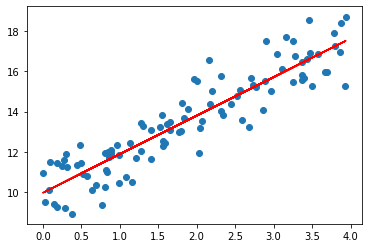

In [11]:
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)
X_new = bias_column(X)

model = LeastSquaresRegression()
model.fit(X_new, y)

y_new = model.predict(X_new)

plt.scatter(X,y)
plt.plot(X,y_new,color= 'red')

In [85]:
class GradientDescentOptimizer():

    def __init__(self, f, fprime, start, learning_rate = 0.1):
        self.f_      = f                       # The function
        self.fprime_ = fprime                  # The gradient of f
        self.current_ = start                  # The current point being evaluated
        self.learning_rate_ = learning_rate    # Does this need a comment ?

        # Save history as attributes
        self.history_ = np.array(start)
    
    def step(self):
        # Take a gradient descent step
        # 1. Compute the new value and update selt.current_
        self.current_ = self.current_ - self.learning_rate_ * f_prime(self.current_) #Grad descent
        # 2. Append the new value to history
        np.append( self.history_,self.current_)
        # Does not return anything

  

        
    def optimize(self, iterations = 100):
        # Use the gradient descent to get closer to the minimum:
        # previous_step_size = np.array([1,1])
        iters = 0
        # For each iteration, take a gradient step
        #while all(previous_step_size > 0.001):
        while iters <= iterations:
            self.step()
            #previous_step_size = abs(self.history_[-1] - self.history_[-2]) #Change in x
            iters += 1
            
    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))
        return self.history_
    
    def plot_it(self):
#         test = np.array(self.history_)
        
        plt.plot(self.history_)
        print(self.history_.shape)
#         plt.plot(test[:,1])

In [86]:
#f(x) = 3 + (x - (2  6)T)T · (x - (2  6)T)
def f(x):
    a = np.array([[2],[6]])
    t = lambda x: 3 + np.dot((x - a).T,(x - a))
    return t(x)

In [87]:
def f_prime(x):
    a = np.array([[2],[6]])
    t = lambda x: 2*(x - a)
    return t(x)

Best theta found is [[1.99829534]
 [5.99363757]]
Value of f at this theta: f(theta) = [[3.00004339]]
Value of f prime at this theta: f'(theta) = [[-0.00340931]
 [-0.01272486]]


<IPython.core.display.Javascript object>


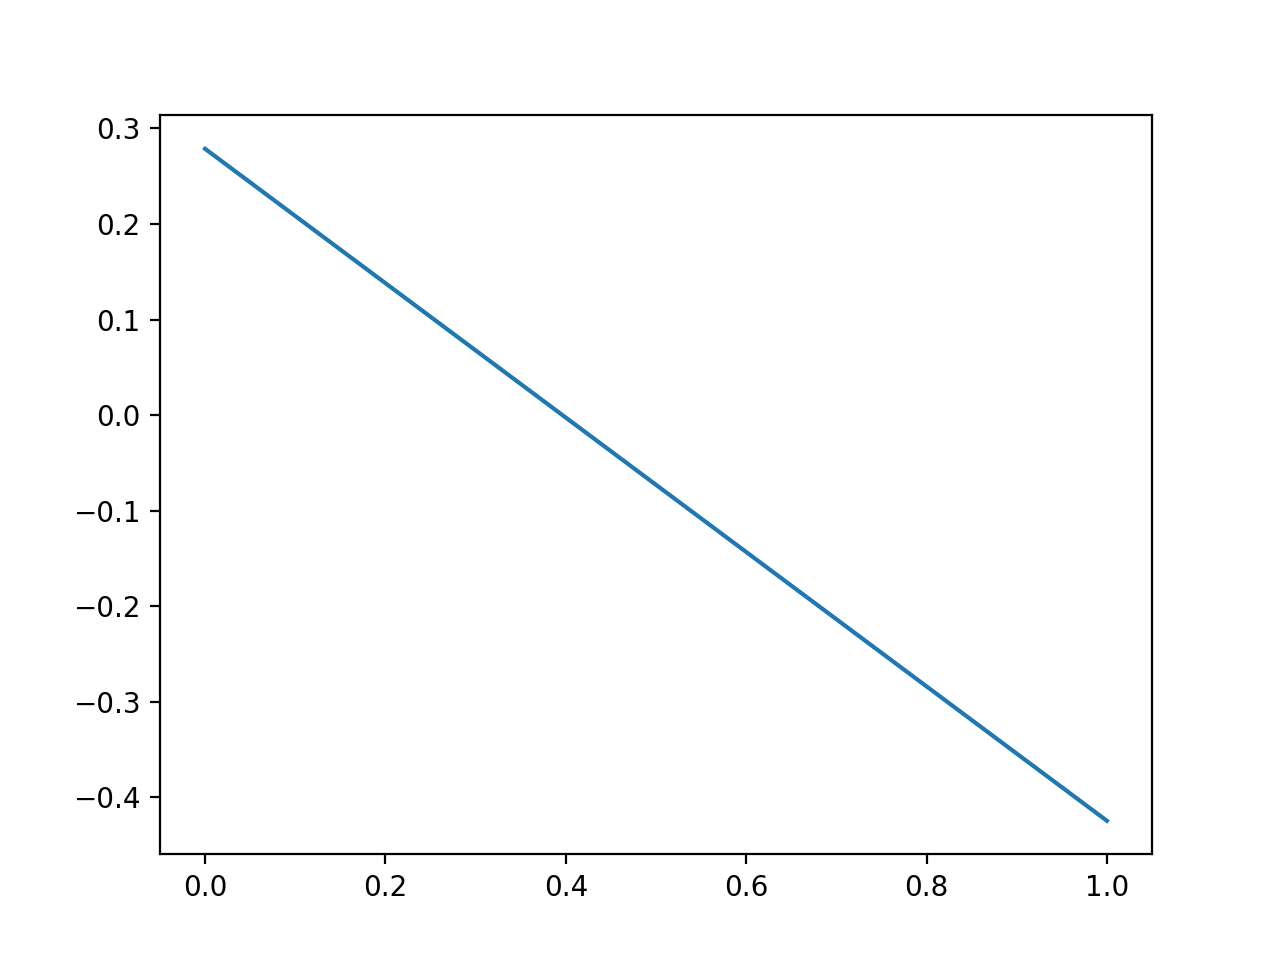

(2, 1)


In [88]:
grad = GradientDescentOptimizer(f, f_prime, np.random.normal(size=(2,1)), 0.1)
grad.optimize(30)
theta = grad.print_result()
grad.plot_it()


<IPython.core.display.Javascript object>


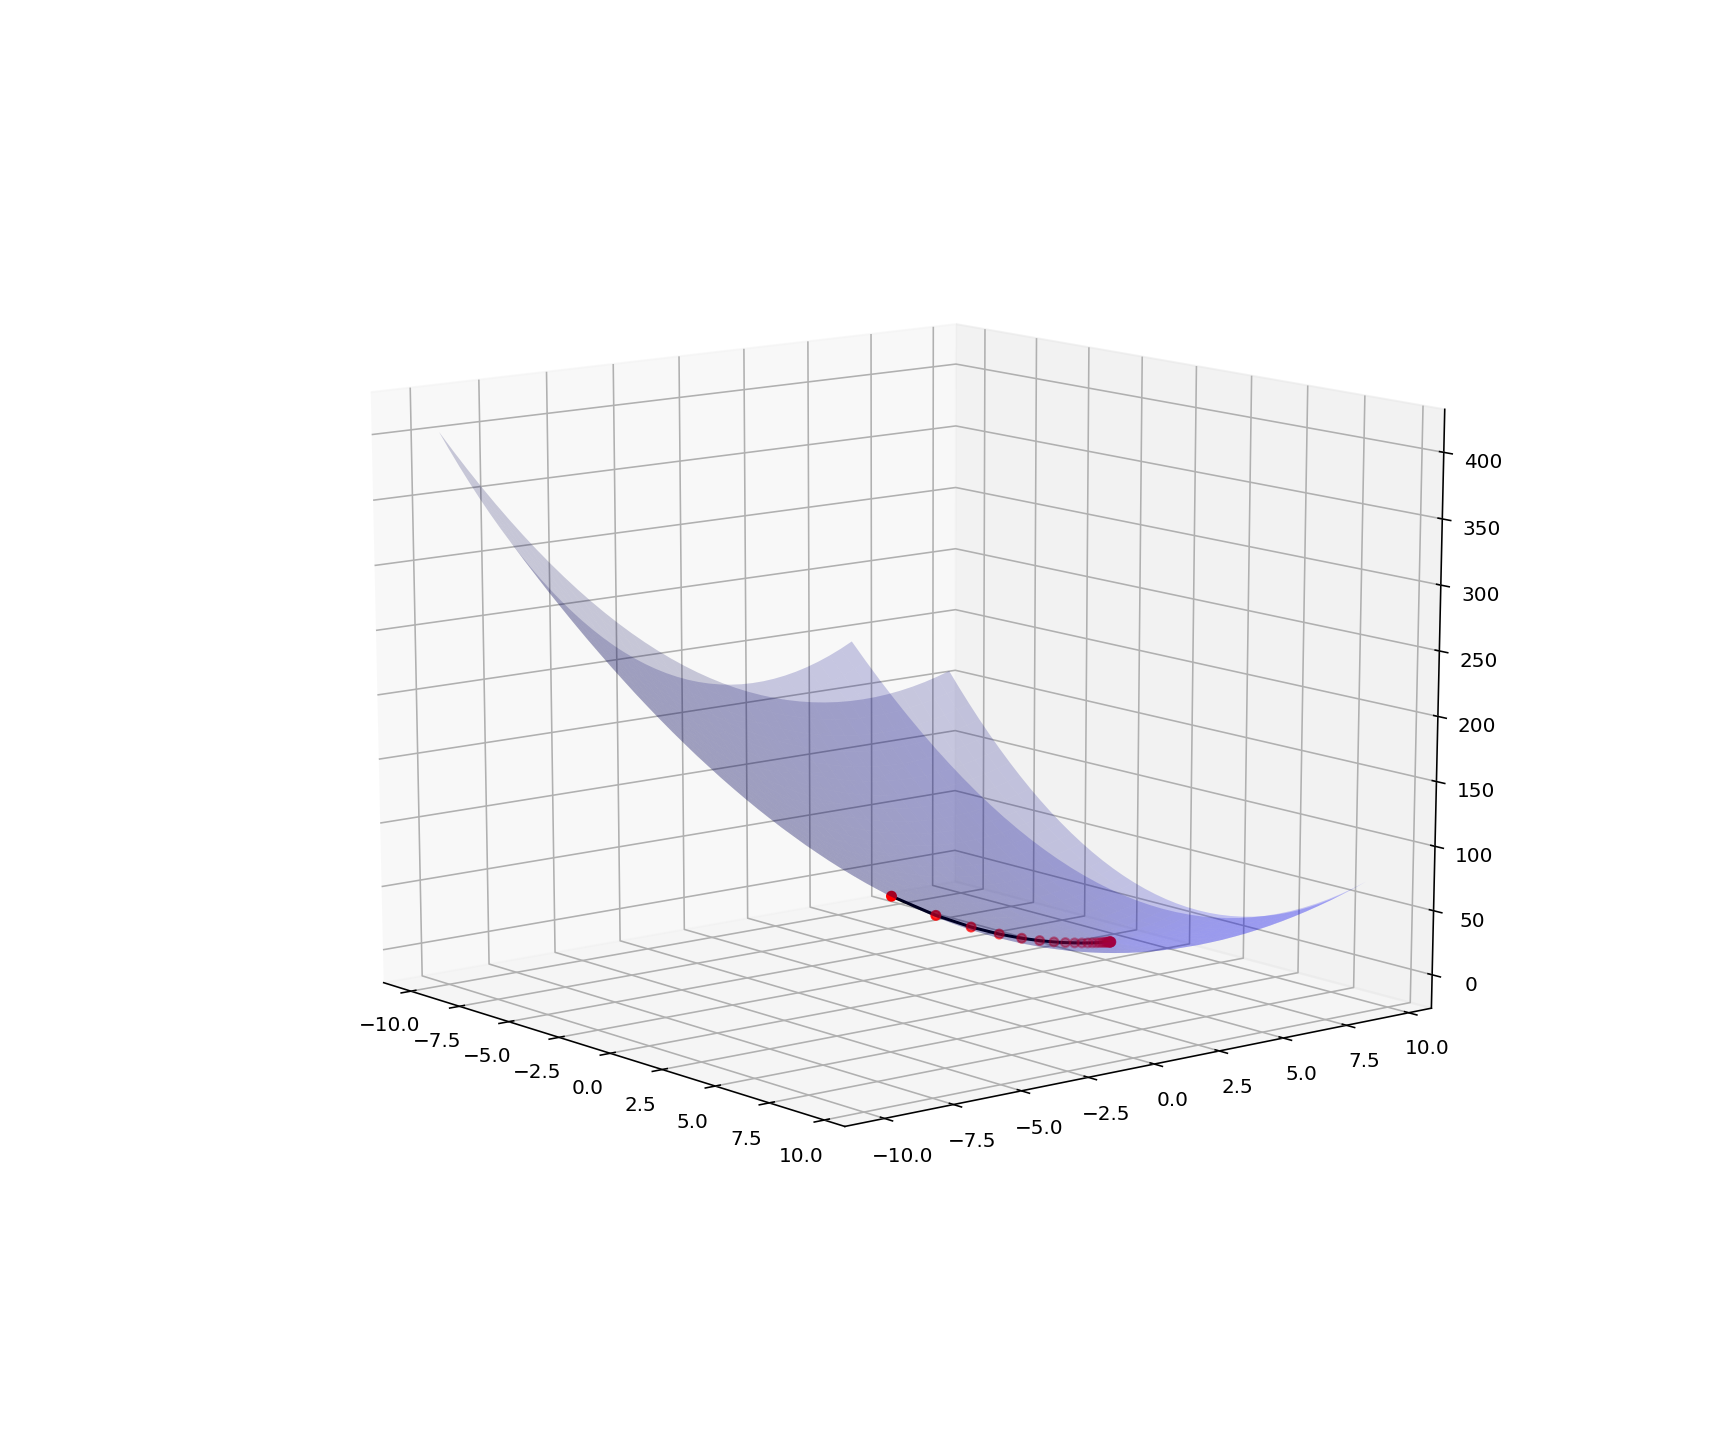

In [492]:
# Set up grid and test data
# x = np.array([[i,i] for i in range(25)])
x1 = np.arange(-10,10,0.5)
x2 = np.arange(-10,10,0.5)
X,Y = np.meshgrid(x1,x2)
zs = np.array([x for x in zip(np.ravel(X), np.ravel(Y))])
Z = []
gradient = []
for i in zs:
    Z.append(f(i))
for i in theta:
    gradient.append(f(i))


Z = np.array(Z).reshape(X.shape)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, color= 'b',alpha= 0.2 )
ax.plot(theta[:,0],theta[:,1],gradient, color= 'k')
ax.scatter(theta[:,0],theta[:,1],gradient, color= 'red')


In [9]:
theta_start = np.random.randn(2,1)
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)
def gradient_descent(X, m, y, theta_start, iterations = 100, learning_rate = 0.1):
     #∇θMSE(θ) = 2⁄m XT·(X·θ - y)
    grad = 2/m*X.T*(np.dot(X,theta)-y)
    theta_prev = theta - learning_rate * grad

# theta = gradient_descent(X_new, 100, y, theta_start)
# print(theta)

In [10]:
theta_start

array([[-0.20312   ],
       [ 0.71513941]])

In [28]:
a = np.array([[2,6,1],[2,6,1]])

In [31]:
theta_start = np.random.randn(2,1)
X = 4 * np.random.rand(100, 1)

In [36]:
one_s = np.ones(100).reshape(100,1)
X = np.append(X,one_s, axis= 1)

In [41]:
np.dot(X,theta_start).shape

(100, 1)

In [107]:
t = np.random.normal(size=(2,1))
k = np.random.normal(size=(2,1))




TypeError: only integer scalar arrays can be converted to a scalar index